In [8]:
import numpy as np

from matplotlib import pyplot as plt

import scipy

import scipy.interpolate

import scipy.integrate

import sympy as sp

import pickle

import opentext

from quadforlss import forecasting as fore

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
def faa(r, cgg, cgn, cnn, dercgg, dercgn, dercnn):
    A = dercgg/cgg-2*r**2.*dercgn/cgn
    A = A**2.
    B = 2*r**2.*(1.-r**2.)*(dercgn/cgn)**2.
    C = 2*r**2.*dercnn/cnn
    C *= (dercgg/cgg-2*dercgn/cgn)
    D = dercnn/cnn
    D = D**2.
    tot = 1./(2*(1.-r**2.)**2.)
    tot *= (A+B+C+D)
    return tot

def fab(cgg, dera_cgg, derb_cgg):
    A = dera_cgg/cgg
    B = derb_cgg/cgg
    tot = 1./2.
    tot *= A*B
    return tot

def getcompleteFisher(cgg, cgn, cnn, acgg, acgn, acnn, bcgg = None, bcgn = None, bcnn = None):
    if bcgg is None:
        bcgg = acgg
        bcgn = acgn
        bcnn = acnn
    gg, gn, nn, agg, agn, ann, bgg, bgn, bnn = sp.symbols('gg gn nn agg agn ann bgg bgn bnn') #agn = der_a(C^{gn})
    daC = sp.Matrix([[agg, agn], [agn, ann]])
    dbC = sp.Matrix([[bgg, bgn], [bgn, bnn]])
    C = sp.Matrix([[gg, gn], [gn, nn]])
    invC = C.inv()
    prod = daC*invC*dbC*invC
    tr = prod.trace()
    final = 0.5*sp.simplify(tr)
    expression = sp.lambdify([gg, gn, nn, agg, agn, ann, bgg, bgn, bnn], final, 'numpy')
    result = expression(cgg, cgn, cnn, acgg, acgn, acnn, bcgg, bcgn, bcnn)
    return result

In [3]:
folder_list = ['mass_bin_1', 'mass_bin_2', 'mass_bin_3', 'mass_bin_4', 'mass_bin_ksz', 'mass_bin_1_02']

## Plot noise curves for Mass Bin 1

In [4]:
direc = folder_list[0]
with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
    dic = pickle.load(handle, encoding='latin1')

In [5]:
filename = 'values.txt'
values = opentext.get_values(direc+'/'+filename)

In [6]:
values

{'ngal': 0.05,
 'mink': 1e-07,
 'maxk': 1.0,
 'minkanalysis': 0.0006768356195,
 'maxkanalysis': 0.034,
 'minkrec': 0.0345474,
 'maxkrec': 0.10160999999999999,
 'z': 0.0,
 'npoints': 10000.0,
 'fnlfid': 1.0,
 'bgfid': 1.06733,
 'b20': -0.364628,
 'bs2': 0.0218576,
 'Mhalo': 0.773,
 'deltac': 1.42,
 'a1': 1.0,
 'a2': -0.8095238095,
 'name': 'mass_bin_1'}

In [7]:
keys = dic['values']
K = dic['K']
shot = 1/dic['ngal']
PL = dic['PL']

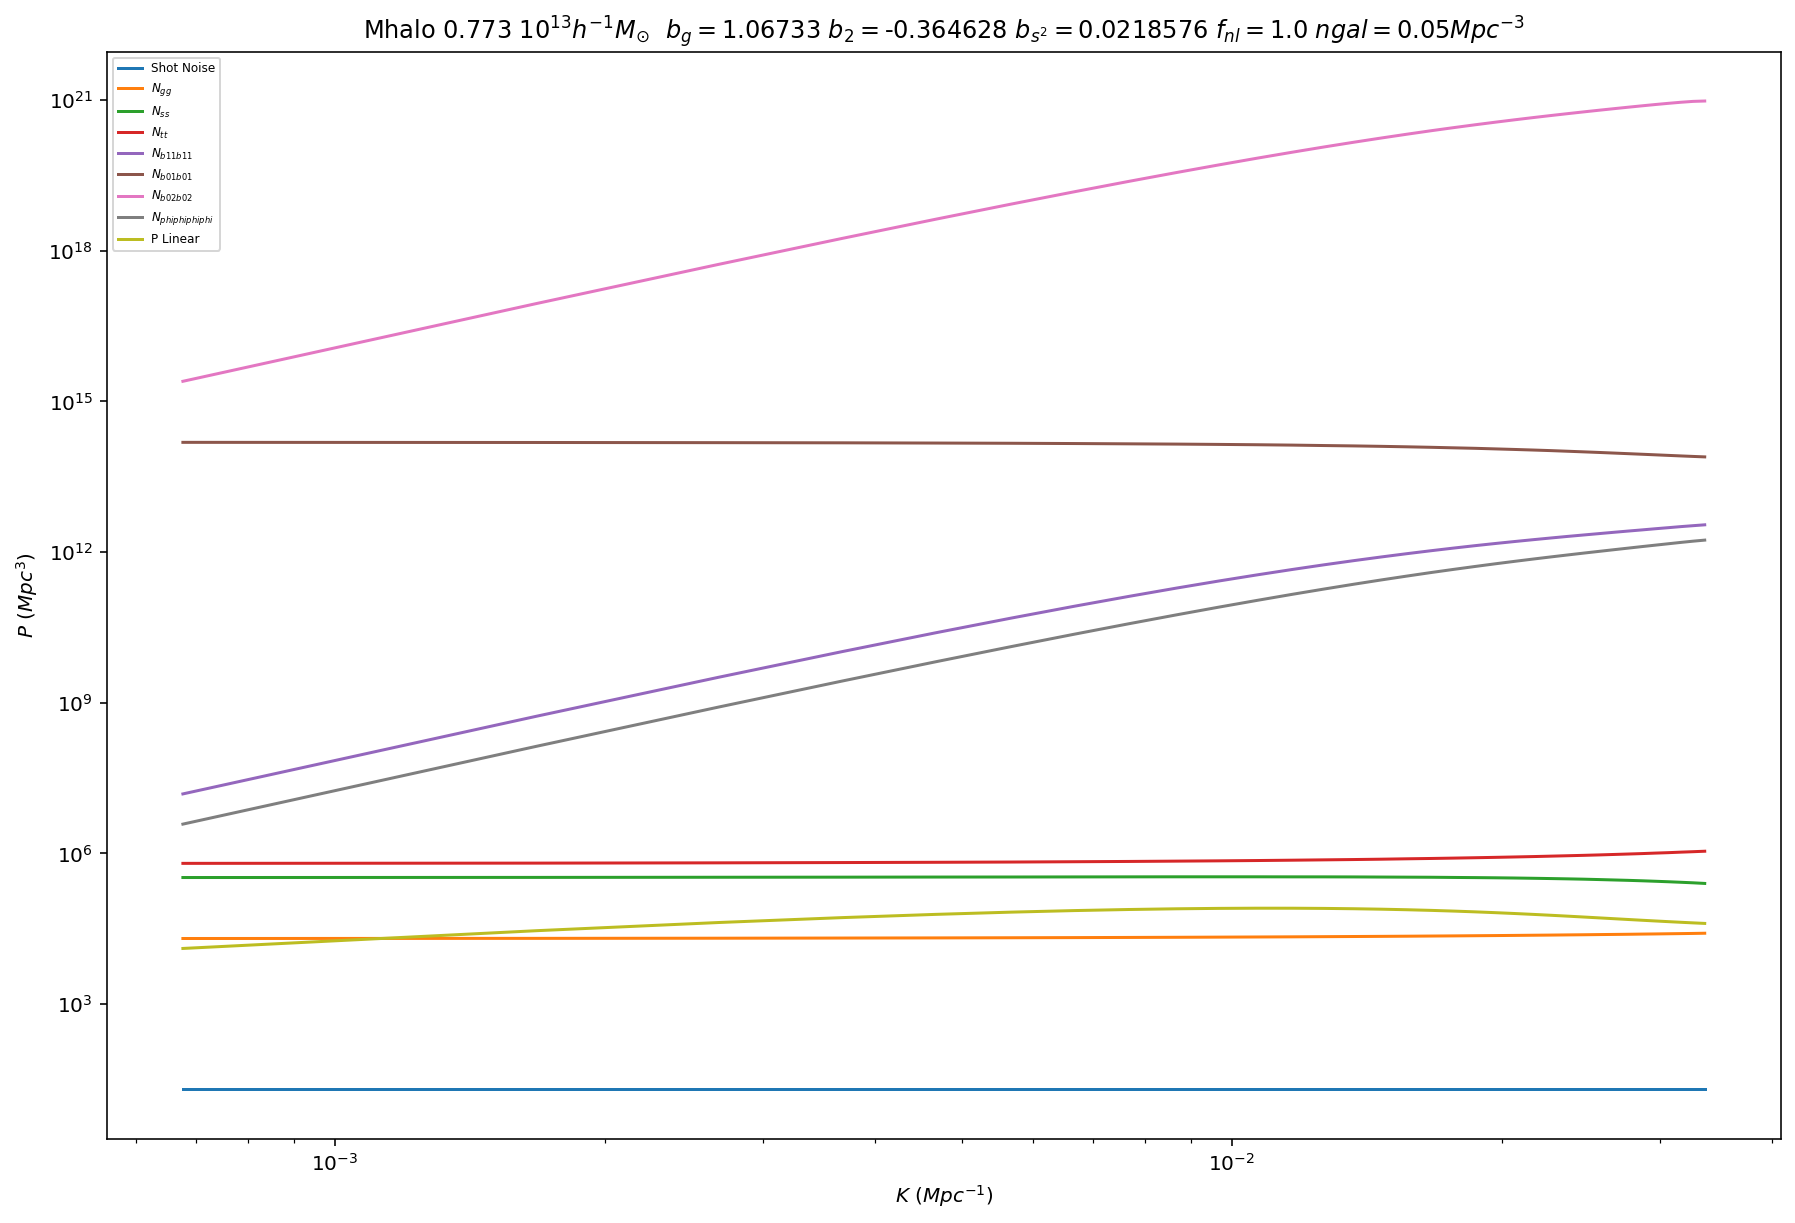

In [10]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
#plt.xlim(0.01, 0.1)
#plt.ylim(1e1, 1e8)
plt.title('Mhalo '+str(values['Mhalo'])+' $10^{13}h^{-1}M_{\odot}$ '+' $b_g=$'+str(values['bgfid'])+' $b_2=$'+str(values['b20'])+' $b_{s^2}=$' + str(values['bs2'])+ ' $f_{nl}=$'+str(values['fnlfid'])+ ' $ngal=$'+str(values['ngal'])+'$Mpc^{-3}$')
plt.xlabel('$K$ $(Mpc^{-1})$')
plt.ylabel('$P$ $(Mpc^{3})$')
ax.loglog(K, K*0+shot, label = 'Shot Noise')
for a in keys.astype(str):
    ax.loglog(K, dic['N'+a+a], label = '$N_{'+a+a+'}$')
ax.loglog(K, PL, label = 'P Linear')
ax.legend(loc = 'best', prop = {'size': 6})
fig.savefig('paper_noise_curves_mass_bin_1.png', dpi = 300)
plt.show()
plt.close(fig)

### Plot $N_{gg}$ for different cases

In [507]:
with open(folder_list[0]+'/data_dir/spectra.pickle', 'rb') as handle:
        dic = pickle.load(handle, encoding='latin1')

In [509]:
dic['PL']

array([12795.81864788, 28877.32986423, 42020.68510237, 52619.00669008,
       61057.5484695 , 67656.52927895, 72682.04427302, 76354.44924845,
       78862.14091671, 80371.69506151, 81023.99247089, 80947.14482021,
       80257.92152209, 79060.83175003, 77451.11922838, 75519.13439202,
       73345.67856634, 70997.90004886, 68535.39363392, 66022.17804601,
       63509.34364186, 61033.29597848, 58619.62190197, 56294.57058137,
       54085.19204695, 52008.00239463, 50071.33698878, 48277.84268772,
       46626.41055583, 45113.72986795, 43734.8699818 , 42483.89511812,
       41354.22570158, 40335.34455701])

In [508]:
dic['Ngg']

array([20197.63181567, 20333.95933074, 20474.66109215, 20624.41484348,
       20759.46779537, 20907.15216756, 21050.88609619, 21205.68499166,
       21348.93952852, 21506.98667116, 21659.46618588, 21807.32590201,
       21970.21817105, 22126.86146894, 22283.22702567, 22438.42971996,
       22610.41886986, 22768.73152722, 22943.17589192, 23105.08219419,
       23280.8309873 , 23460.8025931 , 23629.97475189, 23824.75809052,
       23985.06914081, 24177.8761267 , 24350.4213116 , 24521.30489154,
       24727.96461796, 24901.93404778, 25100.50868998, 25284.09306335,
       25482.01174346, 25714.10387729])

In [511]:
color = {'mass_bin_1': 'red', 'mass_bin_2': 'blue', 'mass_bin_3': 'green', 'mass_bin_4': 'orange', 'mass_bin_ksz': 'cyan', 'mass_bin_1_02': 'purple'}

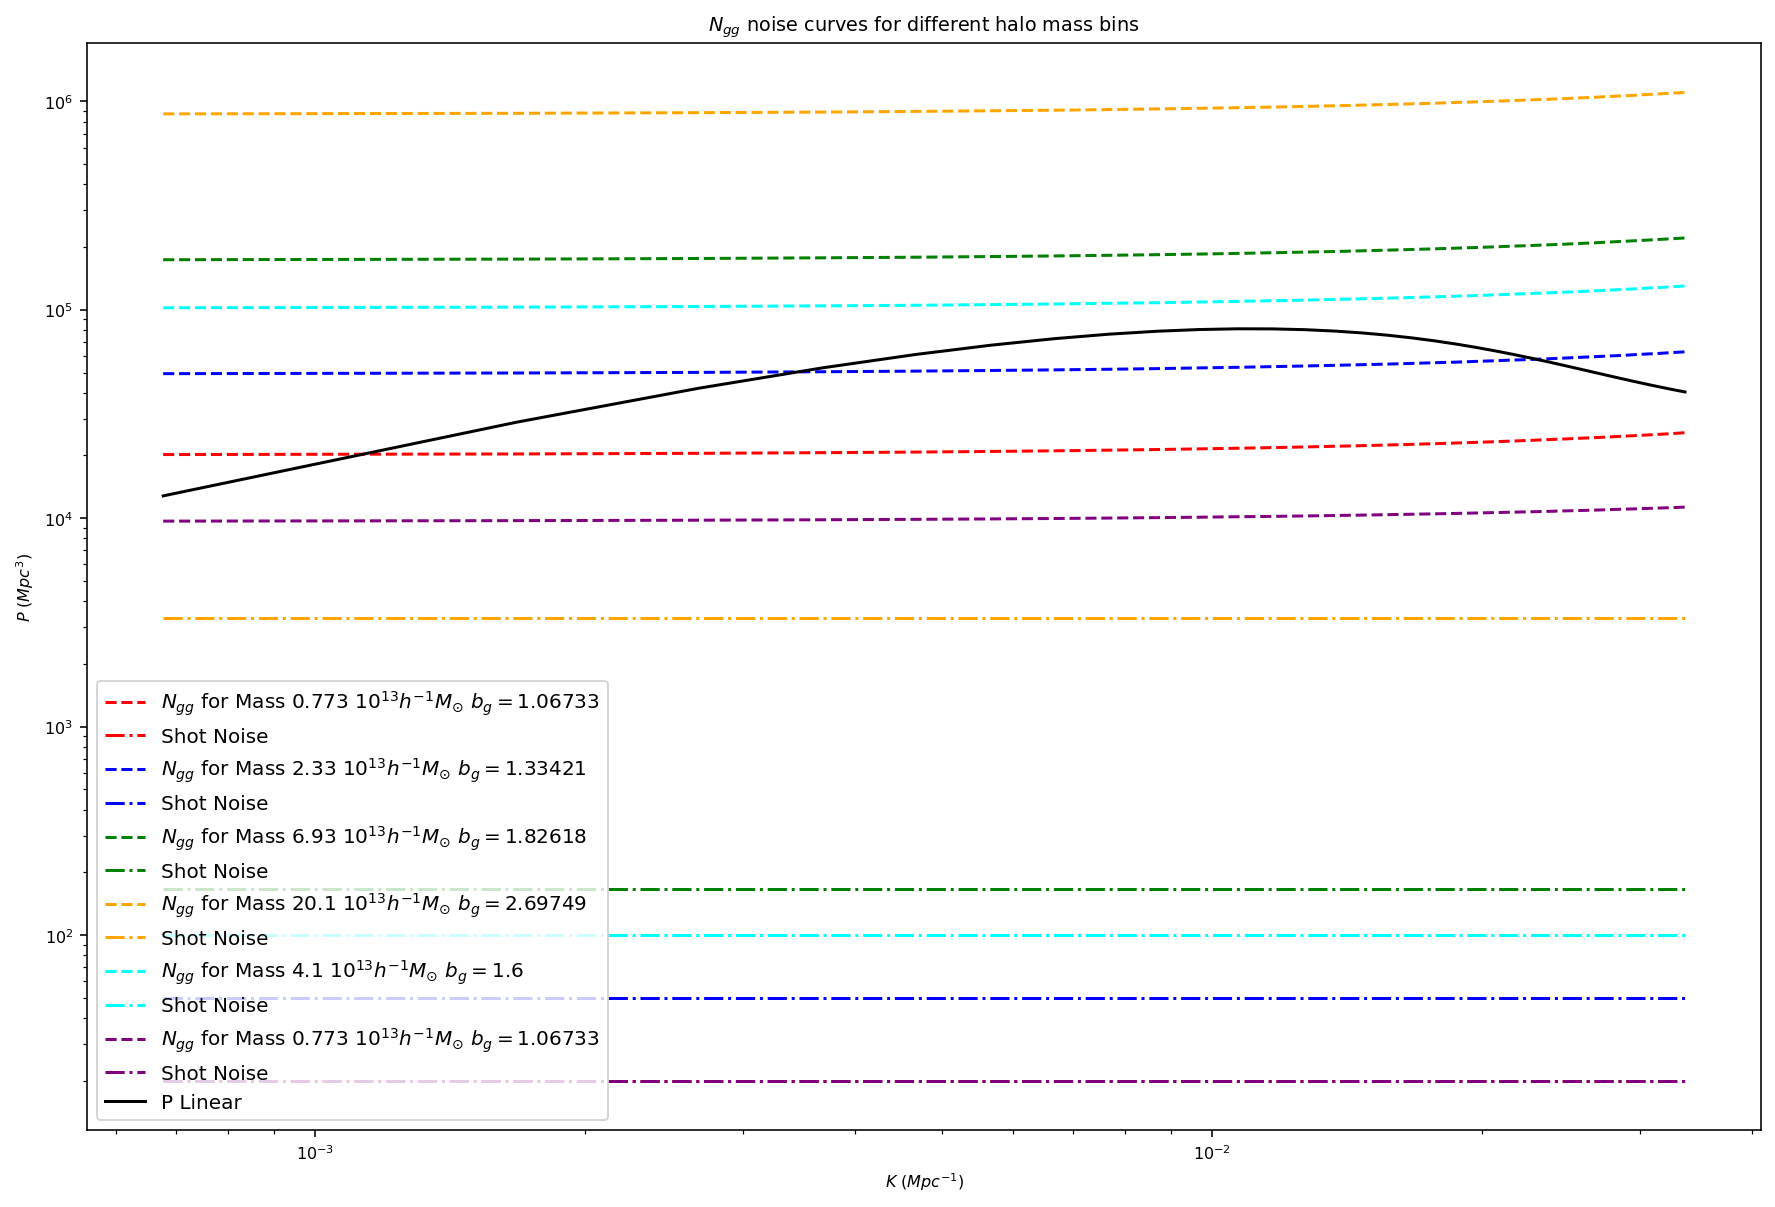

In [531]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
plt.xlabel('$K$ $(Mpc^{-1})$')
plt.ylabel('$P$ $(Mpc^{3})$')


plt.title('$N_{gg}$ noise curves for different halo mass bins')
for direc in folder_list:
    with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
        dic = pickle.load(handle, encoding='latin1')
    values = opentext.get_values(direc+'/'+filename)
    ax.loglog(K, dic['Ngg'], color = color[direc], ls = '--', label = '$N_{gg}$ for Mass '+str(values['Mhalo'])+' $10^{13}h^{-1}M_{\odot}$'+' $b_g=$'+str(values['bgfid']))
    ax.loglog(K, K*0+1/dic['ngal'], color = color[direc], ls = '-.', label = 'Shot Noise')
ax.loglog(K, PL, color = 'black', label = 'P Linear')
ax.legend(loc = 'best', prop = {'size': 10})
fig.savefig('paper_noise_curves_different_mass_bins.png', dpi = 300)
plt.show()
plt.close(fig)

### Plot $N_{gg}$ and bispectrum and trispectrum shot noises for different cases

In [42]:
folder_list = ['high_kmax_ksz_config']

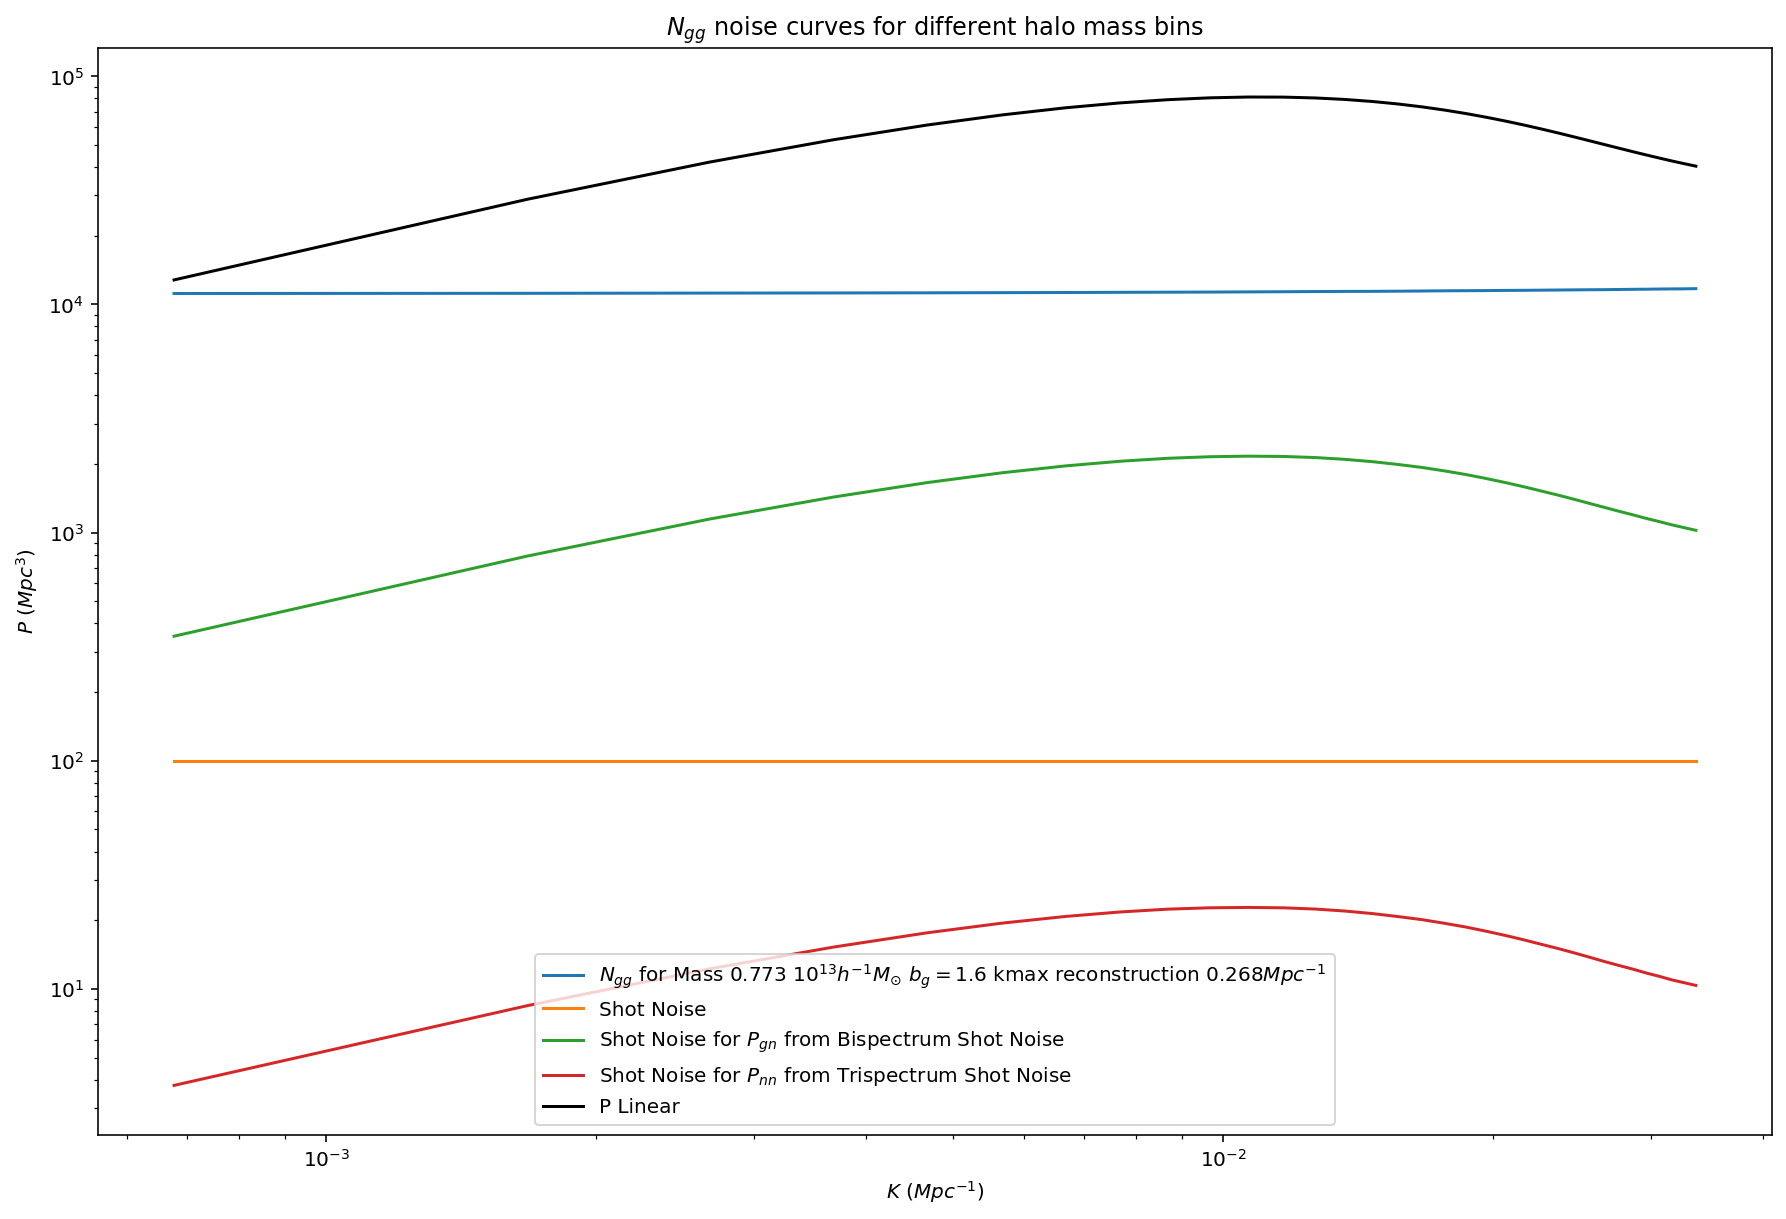

In [43]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
plt.xlabel('$K$ $(Mpc^{-1})$')
plt.ylabel('$P$ $(Mpc^{3})$')


plt.title('$N_{gg}$ noise curves for different halo mass bins')
for direc in folder_list:
    with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
        dic = pickle.load(handle, encoding='latin1')
    values = opentext.get_values(direc+'/'+filename)
    K = dic['K']
    PL = dic['PL']
    ax.loglog(K, dic['Ngg'], label = '$N_{gg}$ for Mass '+str(values['Mhalo'])+' $10^{13}h^{-1}M_{\odot}$'+' $b_g=$'+str(dic['bg']) +' kmax reconstruction ' + str(values['maxkrec'])+'$Mpc^{-1}$')
    ax.loglog(K, K*0+1/dic['ngal'], label = 'Shot Noise')
    ax.loglog(K, dic['shot_noise_bispectrum'], label = 'Shot Noise for $P_{gn}$ from Bispectrum Shot Noise')
    ax.loglog(K, dic['shot_noise_trispectrum'], label = 'Shot Noise for $P_{nn}$ from Trispectrum Shot Noise')
ax.loglog(K, PL, color = 'black', label = 'P Linear')
ax.legend(loc = 'best', prop = {'size': 10})
fig.savefig('paper_noise_curves_different_mass_bins.png', dpi = 300)
plt.show()
plt.close(fig)

## Contamination for mass_bin_1

In [18]:
direc = folder_list[0]
with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
    dic = pickle.load(handle, encoding='latin1')
    
filename = 'values.txt'
values = opentext.get_values(direc+'/'+filename)

In [19]:
values

{'ngal': 0.05,
 'mink': 1e-07,
 'maxk': 1.0,
 'minkanalysis': 0.0006768356195,
 'maxkanalysis': 0.034,
 'minkrec': 0.0345474,
 'maxkrec': 0.10160999999999999,
 'z': 0.0,
 'npoints': 10000.0,
 'fnlfid': 1.0,
 'bgfid': 1.06733,
 'b20': -0.364628,
 'bs2': 0.0218576,
 'Mhalo': 0.773,
 'deltac': 1.42,
 'a1': 1.0,
 'a2': -0.8095238095,
 'name': 'mass_bin_1'}

In [20]:
keys = dic['values']
K = dic['K']
shot = 1/dic['ngal']
PL = dic['PL']
fnl = dic['fnl']

bgfid = dic['bg']
nbar = dic['ngal']

N = dic['Ngg']
M = dic['M']


In [21]:
bgfid

1.06733

In [22]:
minkrec = values['minkrec']
maxkrec = values['maxkrec']

alpha = 42328969.6526119
deltak = maxkrec-minkrec
deltaV = 4*np.pi/3*(maxkrec**3.-minkrec**3.)

In [23]:
somma = 0.
somma_fnl = 0.
somma_other = 0.

In [24]:
color = {'g': 'red', 's': 'blue', 't': 'green', 'phiphi': 'black', 'b01': 'orange', 'b02': 'yellow', 'b11': 'cyan'}

In [529]:
color = {'mass_bin_1': 'red', 'mass_bin_2': 'blue', 'mass_bin_3': 'green', 'mass_bin_4': 'orange', 'mass_bin_ksz': 'cyan', 'mass_bin_1_02': 'purple'}

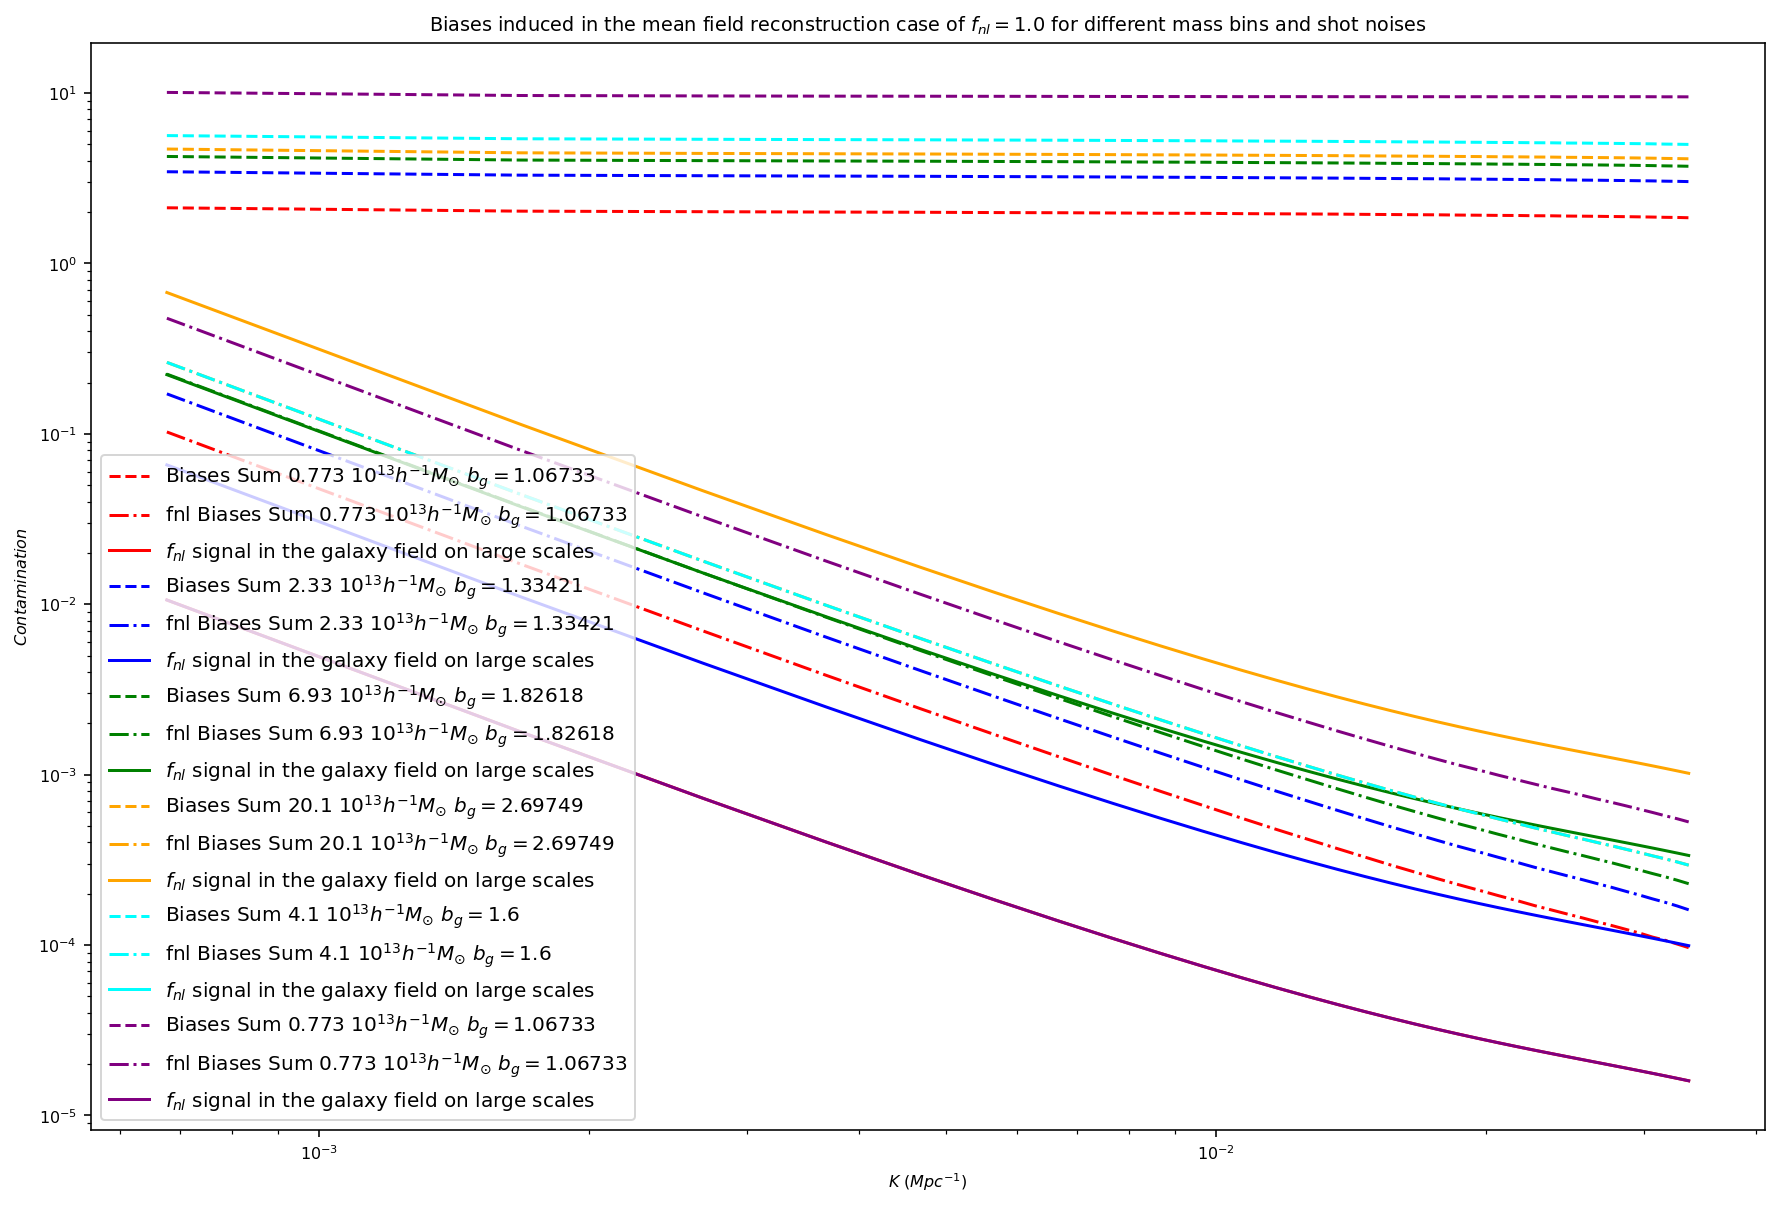

In [722]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
plt.rc('font', size = 8)
plt.title('Biases induced in the mean field reconstruction case of $f_{nl}=$'+str(fnl)+' for different mass bins and shot noises')
plt.xlabel('$K$ $(Mpc^{-1})$')
plt.ylabel('$Contamination$')

somma = 0.
somma_fnl = 0.
somma_other = 0.

for direc in folder_list:
    with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
        dic = pickle.load(handle, encoding='latin1')
    values = opentext.get_values(direc+'/'+filename)
    
    keys = dic['values']
    K = dic['K']
    shot = 1/dic['ngal']
    PL = dic['PL']
    fnl = dic['fnl']
    bgfid = dic['bg']
    nbar = dic['ngal']
    M = dic['M']
    for a in keys.astype(str):
        factor = 1.
        sign = ''
        if a in np.array(['s', 'b01', 'b02']):
            factor = -1.
            sign = '-'
        somma += bgfid*N/dic['N'+a+'g']*dic['k'+a]
        if a in np.array(['phiphi', 'b01', 'b02', 'b11']):
            somma_fnl += bgfid*N/dic['N'+a+'g']*dic['k'+a]
        elif a in np.array(['g', 's', 't']):
            somma_other += bgfid*N/dic['N'+a+'g']*dic['k'+a]
        #ax.loglog(K, factor*bgfid*N/dic['N'+a+'g']*dic['k'+a], color = color[a], label = sign +a +' term')
    stringa = str(values['Mhalo'])+' $10^{13}h^{-1}M_{\odot}$'+' $b_g=$'+str(values['bgfid'])
    ax.loglog(K, somma, ls = '--', color = color[direc], label = 'Biases Sum '+stringa)
    ax.loglog(K, somma_fnl, ls = '-.', color = color[direc], label = 'fnl Biases Sum '+stringa)
    '''
intergration = 0.67*0.785278
ax.loglog(K, K*0.+bgfid*dic['kb01']*4*np.pi*7/10*(1/alpha)*(deltak/deltaV+intergration), ls = '--', color = color['b01'], label = 'Analytic Approx b01')
ax.loglog(K, bgfid*dic['kphiphi']*7./5.*1/M, ls = '--', color = color['phiphi'], label = 'Analytic Approx phiphi')
ax.loglog(K, bgfid*dic['kb11']*7./10.*(1/M+4*np.pi/deltaV*1/alpha*deltak), ls = '--', color = color['b11'], label = 'Analytic Approx b11')
ax.loglog(K, -bgfid*dic['kb02']*14./5.*2*np.pi*1./alpha*(1/deltaV)*1/M*intergration, color = color['b02'], ls = '--', label = 'Analytic Approx b02' )
    '''
    ax.loglog(K, bgfid*dic['derbfnllargescales']*fnl, color = color[direc], label = '$f_{nl}$ signal in the galaxy field on large scales')
ax.legend(loc = 'best', prop = {'size': 10})
plt.show()
fig.savefig('paper_biases_forecast_mass_bins.png', dpi = 300)
plt.close(fig)

### Difference of contaminations

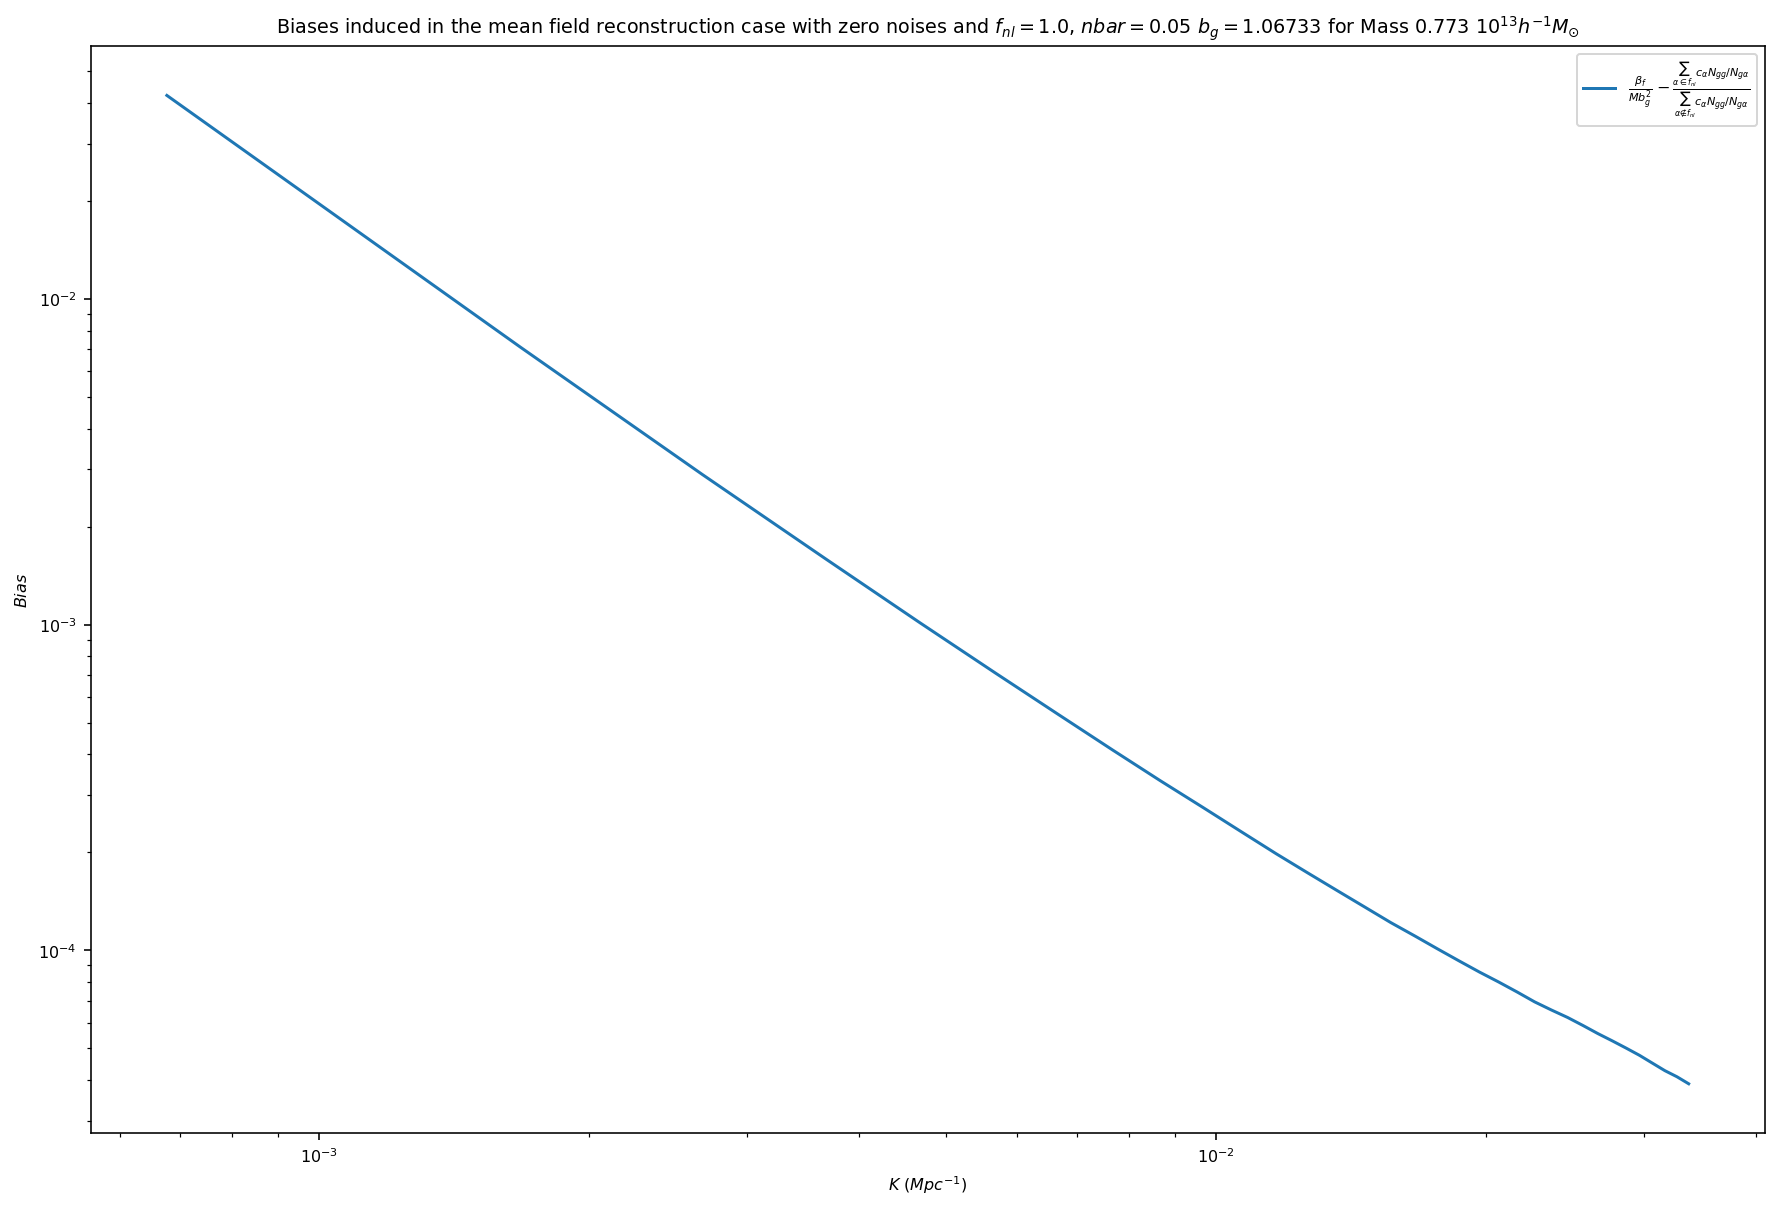

In [110]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
plt.rc('font', size = 8)
plt.title('Biases induced in the mean field reconstruction case with zero noises and $f_{nl}=$'+str(fnl)+', $nbar = $'+str(nbar)+ ' $b_g=$'+str(bgfid)+' for Mass '+str(values['Mhalo'])+' $10^{13}h^{-1}M_{\odot}$')
plt.xlabel('$K$ $(Mpc^{-1})$')
plt.ylabel('$Bias$')
ax.loglog(K, abs(dic['derbfnllargescales']/bgfid**2.-somma_fnl/somma_other), label = '$\\frac{\\beta_f}{ Mb_g^2 }-\\frac{\\sum_{\\alpha \\in f_{nl}}c_{\\alpha}N_{gg}/N_{g\\alpha}}{\\sum_{\\alpha \\notin f_{nl}}c_{\\alpha}N_{gg}/N_{g\\alpha}}$')
ax.legend(loc = 'best')
plt.show()
fig.savefig('paper_contamination_difference_forecast_mass_bin_1.png', dpi = 300)
plt.close(fig)

### Correlation coefficients

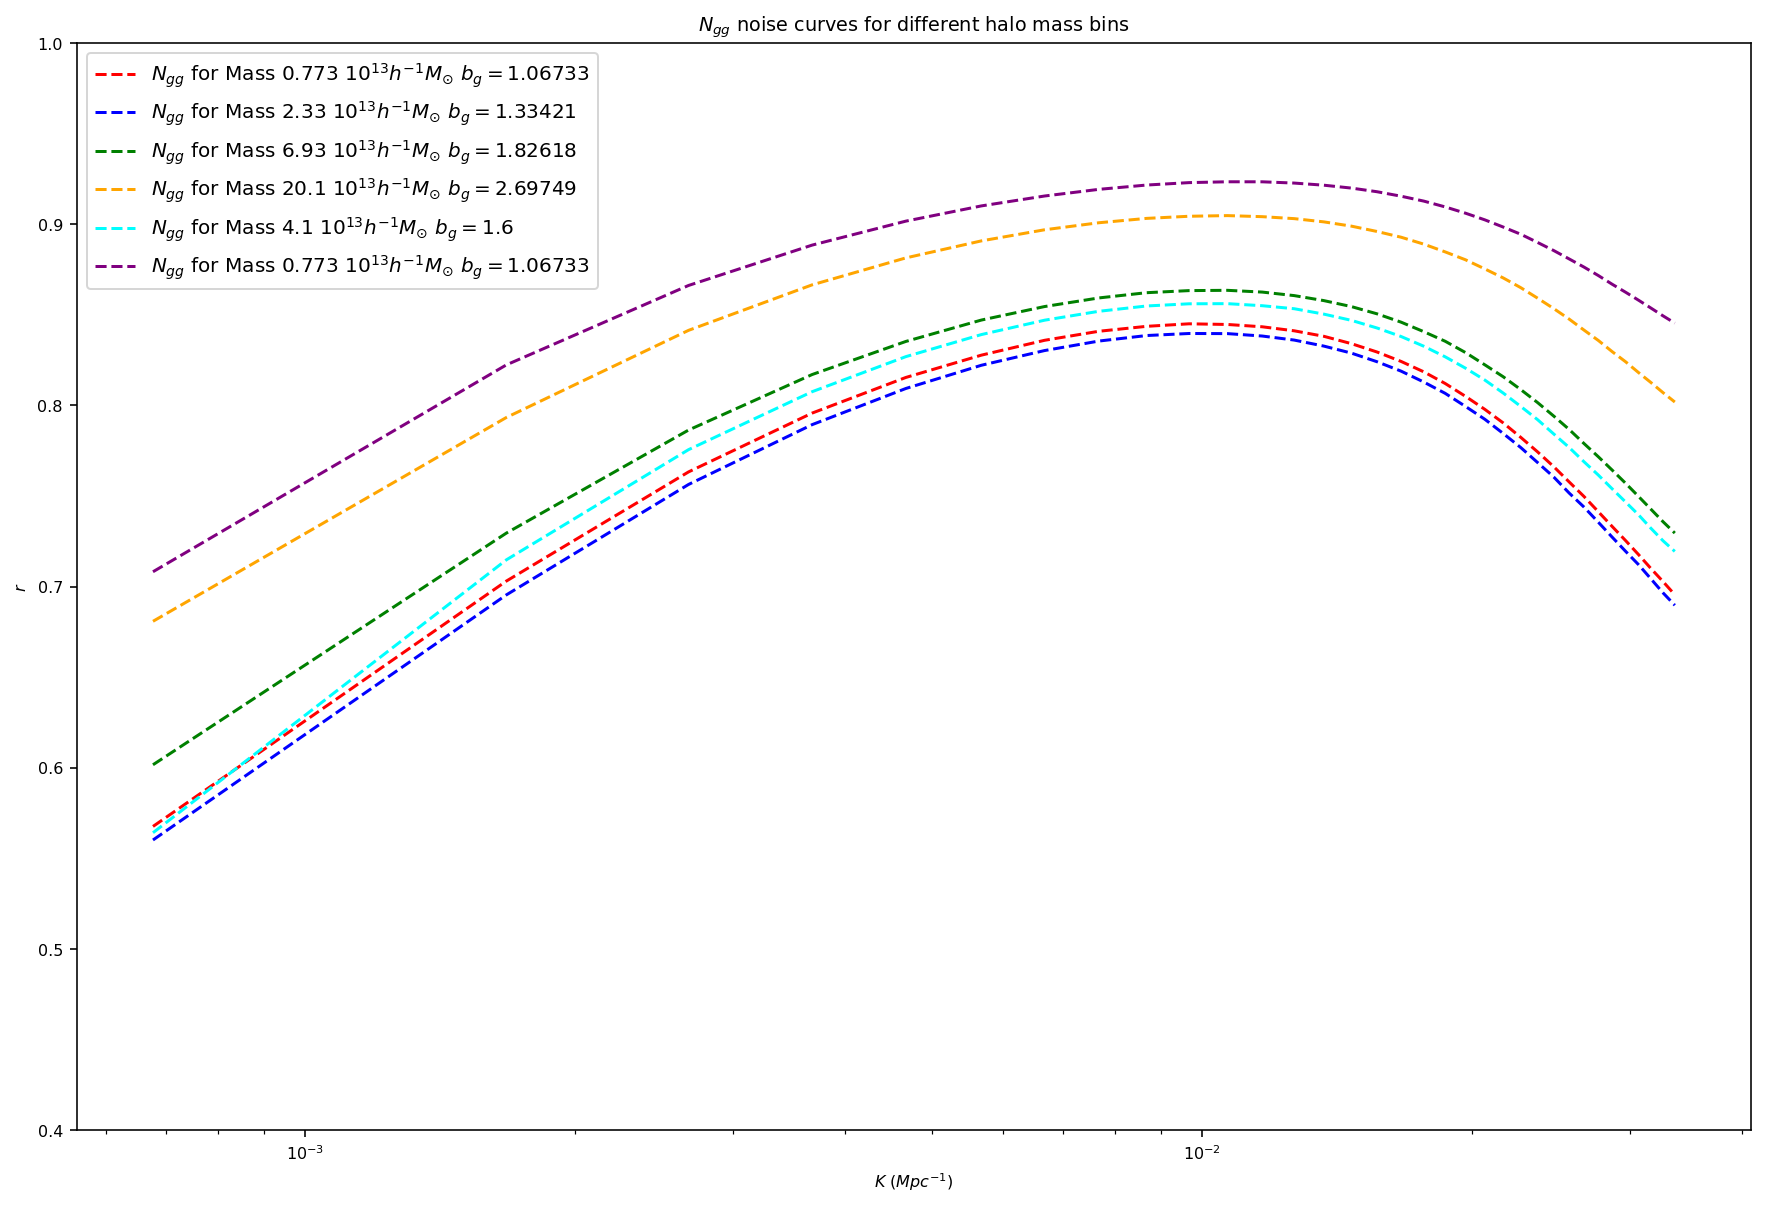

In [723]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
plt.xlabel('$K$ $(Mpc^{-1})$')
plt.ylabel('$r$')


plt.title('$N_{gg}$ noise curves for different halo mass bins')
for direc in folder_list:
    with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
        dic = pickle.load(handle, encoding='latin1')
    K = dic['K']
    values = opentext.get_values(direc+'/'+filename)
    r2 = dic['Cgn']**2./(dic['Cgg']*dic['Cnn'])
    ax.plot(K, np.sqrt(r2), color = color[direc], ls = '--', label = '$N_{gg}$ for Mass '+str(values['Mhalo'])+' $10^{13}h^{-1}M_{\odot}$'+' $b_g=$'+str(values['bgfid']))
ax.legend(loc = 'best', prop = {'size': 10})
fig.savefig('paper_corr_coeff_curves_different_mass_bins.png', dpi = 300)
plt.ylim(0.4, 1)
plt.xscale('log')
plt.show()
plt.close(fig)

### gg only

In [8]:
def faa(r, cgg, cgn, cnn, dercgg, dercgn, dercnn):
    A = dercgg/cgg-2*r**2.*dercgn/cgn
    A = A**2.
    B = 2*r**2.*(1.-r**2.)*(dercgn/cgn)**2.
    C = 2*r**2.*dercnn/cnn
    C *= (dercgg/cgg-2*dercgn/cgn)
    D = dercnn/cnn
    D = D**2. 
    tot = 1./(2*(1.-r**2.)**2.)
    tot *= (A+B+D)
    return tot

def f_gg_only(cgg, dercgg):
    return 0.5*(dercgg/cgg)**2.

In [9]:
dic.keys()

dict_keys(['K', 'Ngg', 'Ngs', 'Nsg', 'Ngt', 'Ntg', 'Ngb11', 'Nb11g', 'Ngb01', 'Nb01g', 'Ngb02', 'Nb02g', 'Ngphiphi', 'Nphiphig', 'Nss', 'Nst', 'Nts', 'Nsb11', 'Nb11s', 'Nsb01', 'Nb01s', 'Nsb02', 'Nb02s', 'Nsphiphi', 'Nphiphis', 'Ntt', 'Ntb11', 'Nb11t', 'Ntb01', 'Nb01t', 'Ntb02', 'Nb02t', 'Ntphiphi', 'Nphiphit', 'Nb11b11', 'Nb11b01', 'Nb01b11', 'Nb11b02', 'Nb02b11', 'Nb11phiphi', 'Nphiphib11', 'Nb01b01', 'Nb01b02', 'Nb02b01', 'Nb01phiphi', 'Nphiphib01', 'Nb02b02', 'Nb02phiphi', 'Nphiphib02', 'Nphiphiphiphi', 'minkh', 'maxkh', 'minkhrec', 'maxkhrec', 'z', 'ngal', 'kphiphi', 'kb01', 'kb11', 'kb02', 'dfnlkphiphi', 'bg', 'ks', 'kt', 'kg', 'b20', 'bs2', 'fnl', 'bfnllargescales', 'derbfnllargescales', 'betaf', 'M', 'Cgg', 'Cnn', 'Cgn', 'dfnlCgg', 'dfnlCgn', 'dfnlCnn', 'PL', 'shotnoise', 'values'])

In [10]:
n_shot = 100.
f_nl = 0.
b_ = 1.6
Bias = b_+2*deltac*(b_-1)/M*f_nl
derBias = 2*deltac*(b_-1)/M

PP = Bias**2.*PL+n_shot
derPP = 2*Bias*derBias*PL

NameError: name 'deltac' is not defined

In [536]:
F = 2*(2*deltac*(b_-1)/(b_*M))**2.
errF = F**-0.5

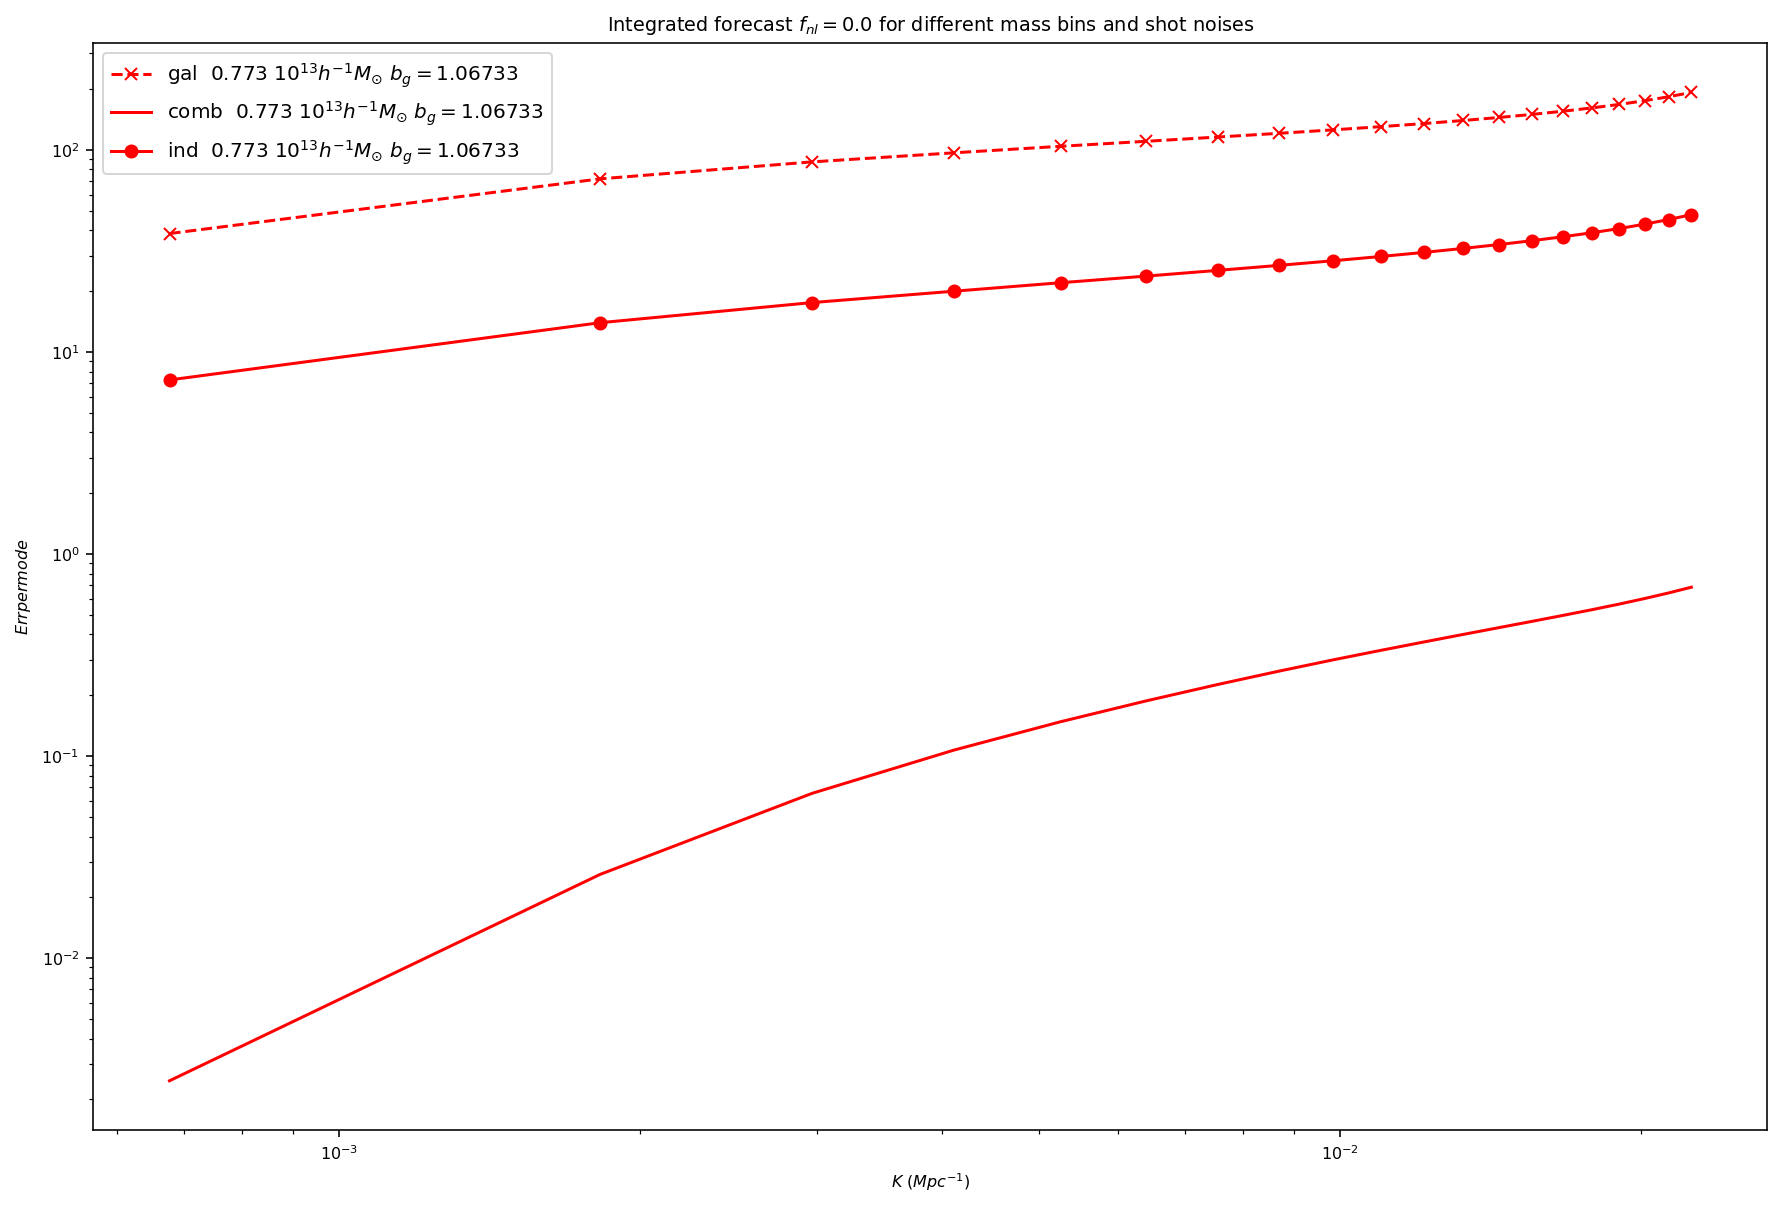

In [737]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
plt.rc('font', size = 8)
plt.title('Integrated forecast $f_{nl}=$'+str(fnl)+' for different mass bins and shot noises')
plt.xlabel('$K$ $(Mpc^{-1})$')
plt.ylabel('$Err per mode$')

for direc in folder_list[:1]:
    with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
        dic = pickle.load(handle, encoding='latin1')
    values = opentext.get_values(direc+'/'+filename)
    
    K = dic['K']
    
    Kmin = np.min(K)
    Kmax = np.max(K)
    
    V = np.pi**3./Kmin**3.
    
    Ks = np.linspace(Kmin, Kmax/1.5, 20)
    
    Cgg = dic['Cgg']
    dfnlCgg = dic['dfnlCgg']
    
    Cgn = dic['Cgn']
    dfnlCgn = dic['dfnlCgn']
    
    Cnn = dic['Cnn']-dic['Ngg']
    dfnlCnn = dic['dfnlCnn']
    
    ''''''
    
    f_indep = faa(r*0, Cgg, Cgn, Cnn, dfnlCgg, dfnlCgn*0., dfnlCnn)
    
    function = scipy.interpolate.interp1d(K, f_indep)
    
    integrated_fisher_indep = []
    
    for K_lower in Ks:
        result = scipy.integrate.quad(lambda x: function(x)*x**2., K_lower, Kmax)
        result = result[0]*V/(2*np.pi**2.)
        integrated_fisher_indep += [result]
        
    integrated_fisher_indep = np.array(integrated_fisher_indep)
    
    err_indep = integrated_fisher_indep**-0.5
    
    ''''''

    
    r = Cgn/np.sqrt(Cnn*Cgg)
    
    f_comb = faa(r, Cgg, Cgn, Cnn, dfnlCgg, dfnlCgn, dfnlCnn)
    
    function = scipy.interpolate.interp1d(K, f_comb)
    
    integrated_fisher_comb = []
    
    for K_lower in Ks:
        result = scipy.integrate.quad(lambda x: function(x)*x**2., K_lower, Kmax)
        result = result[0]*V/(2*np.pi**2.)
        integrated_fisher_comb += [result]
        
    integrated_fisher_comb = np.array(integrated_fisher_comb)
    
    err_comb = integrated_fisher_comb**-0.5
    
    ''''''
    
    f = f_gg_only(Cgg, dfnlCgg)
    
    function = scipy.interpolate.interp1d(K, f)
    
    integrated_fisher = []
    
    for K_lower in Ks:
        result = scipy.integrate.quad(lambda x: function(x)*x**2., K_lower, Kmax)
        result = result[0]*V/(2*np.pi**2.)
        integrated_fisher += [result]
        
    integrated_fisher = np.array(integrated_fisher)
    
    err = integrated_fisher**-0.5
    
    stringa = str(values['Mhalo'])+' $10^{13}h^{-1}M_{\odot}$'+' $b_g=$'+str(values['bgfid'])
    ax.loglog(Ks, err, marker = 'x', ls = '--', color = color[direc], label = 'gal  '+stringa)
    ax.loglog(Ks, err_comb, color = color[direc], label = 'comb  '+stringa)
    ax.loglog(Ks, err_indep, marker = 'o', color = color[direc], label = 'ind  '+stringa)
        
ax.legend(loc = 'best', prop = {'size': 10})
plt.show()
fig.savefig('gg_only_forecast.png', dpi = 300)
plt.close(fig)

In [504]:
r

array([0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678])

### Marginalized forecasts

In [38]:
def diff(expr, var, allvars):
    temp = sp.diff(expr, var)
    expr = sp.lambdify(allvars, temp, 'numpy')
    return expr

def getIntregratedFisher(K, FisherPerMode, kmin, kmax, V):
    if (kmin<np.min(K)) or (kmax>np.max(K)):
        print('Kmin(Kmax) should be higher(lower) than the minimum(maximum) of the K avaliable!')
        return 0
    else:
        function = scipy.interpolate.interp1d(K, FisherPerMode)
        result = scipy.integrate.quad(lambda x: function(x)*x**2., kmin, kmax)
        result = result[0]*V/(2.*np.pi**2.)
        return result


def getAllFisherElements(listdersPA, listdersPB, listdersPAB, PA, PB, PAB):
    Nvars = len(listdersPA)
    NKs = len(PA)
    AllFisherElements = np.zeros((Nvars, Nvars, NKs))
    for i in range(Nvars):
        for j in range(i, Nvars):
            der_i_PA = listdersPA[i]
            der_j_PA = listdersPA[j]
            der_i_PB = listdersPB[i]
            der_j_PB = listdersPB[j]
            der_i_PAB = listdersPAB[i]
            der_j_PAB = listdersPAB[j]
            fisherpermode_i_j = getcompleteFisher(PA, PAB, PB, der_i_PA, der_i_PAB, der_i_PB, der_j_PA, der_j_PAB, der_j_PB)
            AllFisherElements[i, j] = fisherpermode_i_j
    for k in range(NKs):
        M = AllFisherElements[:, :, k]
        AllFisherElements[:, :, k] = (M+M.T-np.diag(np.diag(M)))
    return AllFisherElements

def getMarginalizedCov(K, V, kmin, kmax, listdersPA, listdersPB, listdersPAB, PA, PB, PAB):
    Nvars = len(listdersPA)
    Ks = np.linspace(kmin, kmax/1.5, num = 20)
    NKs = len(Ks)
    AllFisherElements = getAllFisherElements(listdersPA, listdersPB, listdersPAB, PA, PB, PAB)
    mat = np.zeros((Nvars, Nvars, NKs))
    for i in range(Nvars):
        for j in range(i, Nvars):
            temp = []
            for k_minimum in Ks:
                temp += [getIntregratedFisher(K, AllFisherElements[i, j], k_minimum, kmax, V)]
            mat[i, j] = np.array(temp)
            
    MarginalizedCov = mat.copy()
    for k in range(NKs):
        M = mat[:, :, k]
        mat[:, :, k] = (M+M.T-np.diag(np.diag(M)))
        M = mat[:, :, k]
        MarginalizedCov[:, :, k] = np.linalg.inv(M)
    return MarginalizedCov, mat, Ks

In [64]:
folder_list = ['mass_bin_3']

In [65]:
len(folder_list)

1

In [66]:
color = {'mass_bin_3': 'red'}

In [ ]:
fig, ax = plt.subplots( nrows = 1, ncols = 1 )
plt.xlabel('$K_{min}$ (Mpc$^{-1}$)')
plt.ylabel('$ Integrated \sigma(f_{nl}) $')

for direc in folder_list[0:1]:
    print(direc)
    with open(direc+'/data_dir/spectra.pickle', 'rb') as handle:
        dic = pickle.load(handle, encoding='latin1')
    values = opentext.get_values(direc+'/'+filename)
    
    Mtransferfile = direc+'/M.txt'
    nonlinpowerfile = direc+'/nonlinear_power.txt'

    kM, Mval = np.transpose(np.loadtxt(Mtransferfile))[0:2,:]
    K, Pnlin = np.transpose(np.loadtxt(nonlinpowerfile))[0:2,:]

    Pnlinscipy = scipy.interpolate.interp1d(K, Pnlin)
    Pnlin = Pnlinscipy(kM)

    a1 = values['a1']
    a2 = values['a2']

    deltac = values['deltac']
    
    
    
    
    fnlfid = values['fnlfid']
    biasgal = values['bgfid']
    plt.title('Forecasts, for $f_{nl}=$'+str(fnlfid)+' bias $b=$'+str(biasgal))

    z = values['z']

    b_, b2_, bs2_, fnl_, nbar_, Pl_, fnlfunc_ = sp.symbols('b b2 bs2 fnl nbar Pl fnlfunc')

    fs_, ft_, f01_, f02_, f11_, fphiphi_, N_ = sp.symbols('fs ft f01 f02 f11 fphiphi N')

    cg = b_+b2_/2.*(7./5.)
    cs = b_*1
    ct = b_+7/2.*bs2_
    cphiphi = b_
    c01 = 2*deltac*(b_-1)
    c11 = (2./a1**2.)*(deltac*(b2_-2*(a1+a2)*(b_-1.))-a1**2.*(b_-1.))+2.*deltac*(b_-1.)
    c02 = 4*deltac*((deltac/a1**2.)*(b2_-2.*(a1+a2)*(b_-1.))-2.*(b_-1.))

    biasnew_ = b_*(cg+(cs*fs_+ct*ft_+(c01*f01_+c11*f11_+cphiphi*fphiphi_)*fnl_+c02*f02_*fnl_**2.))

    biasg_ = b_+c01*fnl_/fnlfunc_

    Ptotnew_ = biasnew_**2.*Pl_+N_
    Ptotg_ = biasg_**2.*Pl_+1/nbar_
    Pcross_ = biasnew_*biasg_*Pl_
    
    allvars = [b_, b2_, bs2_, fnl_, nbar_, Pl_, fnlfunc_, fs_, ft_, f01_, f02_, f11_, fphiphi_, N_]
    
    der_b_Ptotnew_, der_b2_Ptotnew_, der_fnl_Ptotnew_, der_bs2_Ptotnew_ = [diff(Ptotnew_, var_, allvars) for var_ in [b_, b2_, fnl_, bs2_]]
    

    der_b_Ptotnew_ = diff(Ptotnew_, b_, allvars)
    der_b2_Ptotnew_ = diff(Ptotnew_, b2_, allvars)
    der_fnl_Ptotnew_ = diff(Ptotnew_, fnl_, allvars)
    der_bs2_Ptotnew_ =diff(Ptotnew_, bs2_, allvars)


    der_b_Ptotg_ = diff(Ptotg_, b_, allvars)
    der_b2_Ptotg_ = diff(Ptotg_, b2_, allvars)
    der_fnl_Ptotg_ = diff(Ptotg_, fnl_, allvars)
    der_bs2_Ptotg_ =diff(Ptotg_, bs2_, allvars)

    der_b_Pcross_ = diff(Pcross_, b_, allvars)
    der_b2_Pcross_ = diff(Pcross_, b2_, allvars)
    der_fnl_Pcross_ = diff(Pcross_, fnl_, allvars)
    der_bs2_Pcross_ =diff(Pcross_, bs2_, allvars)
    
    Cgg = dic['Cgg']
    Cnn = dic['Cnn']
    Cgn = dic['Cgn']

    bg = dic['bg']
    b20 = dic['b20']

    Ngg = dic['Ngg']
    Ngs = dic['Ngs']
    Ngt = dic['Ngt']
    Ngb01 = dic['Ngb01']
    Ngb02 = dic['Ngb02']
    Ngb11 = dic['Ngb11']
    Ngphiphi = dic['Ngphiphi']
    
    
    KK = dic['K']
    
    kmin = np.min(KK)
    kmax = np.max(KK)
    
    V = np.pi**3./kmin**3.

    Mval = dic['M']
    
    M = dic['M']

    fnlfid = dic['fnl']

    fs = Ngg/Ngs
    ft = Ngg/Ngt
    f01 = Ngg/Ngb01
    f02 = Ngg/Ngb02
    f11 = Ngg/Ngb11
    fphiphi = Ngg/Ngphiphi

    bs2 = dic['bs2']
    PL = dic['PL']
    b = bg
    fnl = fnlfid
    nbar = dic['ngal']
    b2 = b20
    N = dic['Ngg']

    actualvalues = [b, b2, bs2, fnl, nbar, PL, M, fs, ft, f01, f02, f11, fphiphi, N]


    der_b_Ptotnew = np.array(der_b_Ptotnew_(*actualvalues))
    der_b2_Ptotnew = np.array(der_b2_Ptotnew_(*actualvalues))
    der_fnl_Ptotnew = np.array(der_fnl_Ptotnew_(*actualvalues))
    der_bs2_Ptotnew = np.array(der_bs2_Ptotnew_(*actualvalues))

    der_b_Ptotg = np.array(der_b_Ptotg_(*actualvalues))
    der_b2_Ptotg = np.array(der_b2_Ptotg_(*actualvalues))
    der_fnl_Ptotg = np.array(der_fnl_Ptotg_(*actualvalues))
    der_bs2_Ptotg = np.array(der_bs2_Ptotg_(*actualvalues))

    der_b_Pcross = np.array(der_b_Pcross_(*actualvalues))
    der_b2_Pcross = np.array(der_b2_Pcross_(*actualvalues))
    der_fnl_Pcross = np.array(der_fnl_Pcross_(*actualvalues))
    der_bs2_Pcross = np.array(der_bs2_Pcross_(*actualvalues))

    Ptotnew_numpy = sp.lambdify(allvars, Ptotnew_, 'numpy')
    Ptotnew = Ptotnew_numpy(*actualvalues)

    Pcross_numpy = sp.lambdify(allvars, Pcross_, 'numpy')
    Pcross = Pcross_numpy(*actualvalues)

    Ptotg_numpy = sp.lambdify(allvars, Ptotg_, 'numpy')
    Ptotg = Ptotg_numpy(*actualvalues)


    listdersPA = np.array([der_b_Ptotnew, der_fnl_Ptotnew, der_bs2_Ptotnew, der_b2_Ptotnew])
    listdersPB = np.array([der_b_Ptotg, der_fnl_Ptotg, der_bs2_Ptotg, der_b2_Ptotg])
    listdersPAB = np.array([der_b_Pcross, der_fnl_Pcross, der_bs2_Pcross, der_b2_Pcross])

    PA = Ptotnew
    PB = Ptotg
    PAB = Pcross   
    
    comb_MarginalizedCov, comb_nonMarginalizedCov, Ks = getMarginalizedCov(KK, V, kmin, kmax, listdersPA, listdersPB, listdersPAB, PA, PB, PAB)
    
    listdersPg = np.array([der_b_Ptotg, der_fnl_Ptotg])
    gal_MarginalizedCov, gal_nonMarginalizedCov, Ks = getMarginalizedCov(KK, V, kmin, kmax, listdersPg, listdersPB*0, listdersPAB*0, Ptotg, PB*1e-10, PAB*1e-10)

    indep_MarginalizedCov, indep_nonMarginalizedCov, Ks = getMarginalizedCov(KK, V, kmin, kmax, listdersPA, listdersPB, listdersPAB*0., PA, PB, PAB*1e-10)
    
    PA = Ptotnew-N
    PB = Ptotg
    PAB = Pcross   
    
    comb_norecnoise_MarginalizedCov, comb_norecnoise_nonMarginalizedCov, Ks = getMarginalizedCov(KK, V, kmin, kmax, listdersPA, listdersPB, listdersPAB, PA, PB, PAB)
    
    comb_norecnoise_errfnl_marg = np.sqrt(comb_norecnoise_MarginalizedCov[1, 1, :])
    comb_norecnoise_errfnl_nonmarg = np.sqrt(comb_norecnoise_nonMarginalizedCov[1, 1, :]**-1.)
    comb_errfnl_marg = np.sqrt(comb_MarginalizedCov[1, 1, :])
    comb_errfnl_nonmarg = np.sqrt(comb_nonMarginalizedCov[1, 1, :]**-1.)
    gal_errfnl_marg = np.sqrt(gal_MarginalizedCov[1, 1, :])
    gal_errfnl_nonmarg = np.sqrt(gal_nonMarginalizedCov[1, 1, :]**-1.)
    indep_errfnl_marg = np.sqrt(indep_MarginalizedCov[1, 1, :])
    indep_errfnl_nonmarg = np.sqrt(indep_nonMarginalizedCov[1, 1, :]**-1.)
        
    stringa = '$bg=$'+str(bg)
    #ax.loglog(Ks, comb_norecnoise_errfnl_marg, marker = 'x', color = color[direc], label = 'Marginalized Combined without reconstruction noise, wrt $f_{nl},\ b,\ b_2, \ b_{s^2}$')
    ax.loglog(Ks, gal_errfnl_nonmarg, ls = ':', color = color[direc], alpha = 0.3, label = 'Non Marginalized Galaxy')
    #ax.loglog(Ks, gal_errfnl_marg, ls = ':', color = color[direc], label = 'Marginalized Galaxy, wrt $f_{nl},\ b$')
    #ax.loglog(Ks, comb_errfnl_marg, ls = '-', color = color[direc], label = 'Marginalized Combined, wrt $f_{nl},\ b,\ b_2, \ b_{s^2}$')
    ax.loglog(Ks, comb_errfnl_nonmarg, ls = '-', color = color[direc], alpha = 0.3, label = 'Non Marginalized Combined')
    ax.loglog(Ks, comb_norecnoise_errfnl_nonmarg, ls = '-', color = color[direc], marker = 'o', alpha = 0.3, label = 'Non Marginalized Combined without reconstruction noise')
    #ax.loglog(Ks, indep_errfnl_marg, ls = '-.', color = color[direc], label = 'Marginalized Independent, wrt $f_{nl},\ b,\ b_2, \ b_{s^2}$')
    ax.loglog(Ks, indep_errfnl_nonmarg, ls = '-.', color = color[direc], alpha = 0.3, label = 'Non Marginalized Independent')
ax.legend(loc = 'best', prop = {'size': 10})
plt.xlim(6e-4, 1e-2)
plt.rc('grid', linestyle = "-", color = 'black')
plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)
#plt.ylim(bottom = 5, top = 300)
plt.show()
fig.savefig('paper_fnl_plot_comb_mass_bins.png', dpi = 300)
plt.close()

mass_bin_3
